# Diagnose und Bereinigung von Datenfehlern mit Python

In dem Datensatz sollen fehlende Werte diagnostiziert, falsche Werte bereinigt und Duplikate entfernt werden.

Link des Datensatzes: <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

---
# 1. Datensatz laden, Überblick verschaffen, fehlende Werte checken, Anzeigeoptionen anpassen

In [3]:
import pandas as pd

# Housing-Datensatz laden (CSV-Datei herunterladen und den Pfad anpassen)
df = pd.read_csv('train.csv')

# Die ersten Zeilen des Datensatzes anzeigen
print(df.head())

# Überblick über die fehlenden Werte in jeder Spalte
print("\nFehlende Werte in den Spalten:")
print(df.isnull().sum())

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

<br>
Der untersten zwei Zeilen Code passen die Anzeigeoptionen von Pandas an, um sicherzustellen, dass alle Zeilen und Spalten eines DataFrames in der Ausgabe angezeigt werden.

Diese Einstellungen sind nützlich, wenn ma einen großen DataFrame komplett sehen möchte, ohne dass Pandas Zeilen oder Spalten ausblendet. Allerdings kann das bei sehr großen DataFrames zu einer unübersichtlichen Darstellung führen.

<br>

**`pd.set_option('display.max_rows', None)`**

- standardmäßig zeigt Pandas nur eine begrenzte Anzahl von Zeilen in der Ausgabe eines DataFrames an (normalerweise etwa 60)
- hier wird Pandas angewiesen, alle Zeilen eines DataFrames anzuzeigen, indem die Beschränkung auf die maximale Zeilenanzahl entfernt wird
- None bedeutet "keine Begrenzung"

<br>

**`pd.set_option('display.max_columns', None)`**

- analog dazu hier die Spalten


---
# 2. Umgang mit fehlenden Werten

## A. Entfernen von fehlenden Werten

In [ ]:
# Entfernen von Zeilen mit fehlenden Werten in der Spalte 'Alley'
df_cleaned = df.dropna(subset=['Alley'])

# Entfernen von Spalten mit vielen fehlenden Werten (z.B. 'PoolQC')
df_cleaned = df.drop(columns=['PoolQC'])

print("\nDaten nach dem Entfernen fehlender Werte:")
print(df_cleaned.isnull().sum())

<br>

- `dropna()` entfernt die Zeilen, bei denen in der Spalte 'Alley' fehlende Werte (NaN) vorhanden sind
- `subset=['Alley']` gibt an, dass nur die Spalte 'Alley' auf fehlende Werte überprüft wird
- Ergebnis ist das DataFrame `df_cleaned`, der nur die Zeilen enthält, in denen die Spalte 'Alley' keine fehlenden Werte hat

## B. Imputation

In [6]:
# Fehlende Werte in der Spalte 'LotFrontage' durch den Mittelwert ersetzen
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# Fehlende Werte in der Spalte 'GarageYrBlt' durch einen Standardwert (z.B. 0 für keine Garage) ersetzen
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# Für kategorische Daten wie 'Alley', fehlende Werte mit 'Keine Gasse' füllen
df['Alley'] = df['Alley'].fillna('Keine Gasse')

print("\nDaten nach der Imputation fehlender Werte:")
print(df.isnull().sum())


Daten nach der Imputation fehlender Werte:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

- `fillna()` füllt fehlende Werte auf
- in erster Zeile mit Mittelwert
- in zweiter Zeile mit Standardwert 0
- in dritter Zeitle mit kategorischm Wert

## C. Duplikate entfernen

In [8]:
# Duplikate im Datensatz überprüfen und entfernen
df_cleaned = df.drop_duplicates()
print("\nGibt es noch Duplikate?", df_cleaned.duplicated().sum())


Gibt es noch Duplikate? 0


- `drop_duplicates()` entfernt alle Duplikate

---
# 3. Visualisierung von fehlenden Werten

Um einen besseren Überblick über fehlende Daten zu erhalten, kann man Seaborn oder Matplotlib verwenden:

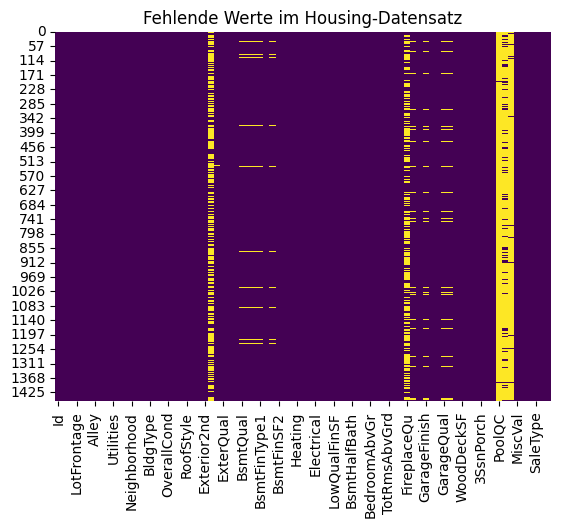

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisierung der fehlenden Werte im Datensatz
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Fehlende Werte im Housing-Datensatz")
plt.show()

<br>
Dieser Code erstellt eine Heatmap, die die Verteilung der fehlenden Werte im DataFrame df zeigt. <br>
Jede Zeile entspricht einer Beobachtung (z. B. ein Haus im Housing-Datensatz) und jede Spalte einem Feature. Hellere Bereiche zeigen, wo Werte fehlen.

- Seaborn wird für die Visualisierung verwendet
- Matplotlib dient als Basis für das Plotten dient

- `df.isnull()` erstellt ein DataFrame mit denselben Dimensionen wie df, wobei alle Werte auf True gesetzt werden, wo im Original-DataFrame ein fehlender Wert (NaN) ist, und False, wo kein fehlender Wert vorliegt

- sns.heatmap() zeichnet eine Heatmap, bei der:
  - jede Zelle im DataFrame visualisiert wird, basierend darauf, ob es sich um einen fehlenden Wert handelt (True = heller Punkt, False = dunkler Punkt)
  - `cbar=False` deaktiviert die Anzeige der Farbleiste
  - `cmap='viridis'` wählt die "viridis"-Farbschema, das von dunklen (keine fehlenden Werte) zu hellen Farben (fehlende Werte) reicht

---
# 4. Umgang mit Datenfehlern und Inkonsistenzen

Der Datensatz wird auch auf Inkonsistenzen geprüft, wie z.B. unplausible Werte, und diese zu bereinigen:

In [10]:
# Unplausible Werte in der Spalte 'YearBuilt' (z.B. Baujahr vor 1800) auf 1900 setzen
df.loc[df['YearBuilt'] < 1800, 'YearBuilt'] = 1900

# Unplausible Daten in der Spalte 'SalePrice' durch den Mittelwert ersetzen
df.loc[df['SalePrice'] < 10000, 'SalePrice'] = df['SalePrice'].mean()

print("\nÜberprüfte Daten nach der Bereinigung unplausibler Werte:")
print(df[['YearBuilt', 'SalePrice']].head())


Überprüfte Daten nach der Bereinigung unplausibler Werte:
   YearBuilt  SalePrice
0       2003   208500.0
1       1976   181500.0
2       2001   223500.0
3       1915   140000.0
4       2000   250000.0


C:\Users\Jens-\AppData\Local\Temp\ipykernel_11932\2805687469.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '180921.19589041095' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SalePrice'] < 10000, 'SalePrice'] = df['SalePrice'].mean()


- in der Spalte YearBuilt (Baujahr) werden alle Werte, die vor dem Jahr 1800 liegen, auf das Jahr 1900 gesetzt.
- könnte in einem Housing-Datensatz sinnvoll sein, da Baujahre vor 1800 möglicherweise unplausibel oder fehlerhaft sind
- `df.loc[]` wählt die Zeilen des DataFrames, bei denen der Wert in der Spalte YearBuilt kleiner als 1800 ist
- `= 1900` setzt die entsprechenden unplausiblen Werte auf 1900
<br>

- in der Spalte SalePrice (Verkaufspreis) werden alle Werte, die kleiner als 10.000 sind, durch den Mittelwert der Spalte ersetzt
- nützlich, um extrem niedrige (möglicherweise fehlerhafte) Verkaufspreise zu korrigieren
- `df['SalePrice'].mean()` berechnet den Mittelwert aller gültigen Verkaufspreise im DataFrame
- Werte unter 10.000 werden durch diesen Mittelwert ersetzt

In [13]:
# Überprüfen, ob in der Spalte fehlende Werte vorhanden sind
missing_data = df.isnull().sum()
print("Anzahl fehlender Werte pro Spalte:")
print(missing_data[missing_data > 0])


Anzahl fehlender Werte pro Spalte:
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


---
# 5. Statistische Analyse nach der Datenbereinigung

Nach der Bereinigung der Daten können einige grundlegende statistische Analysen durchgeführt werden.

In [14]:
# Durchschnittlicher Verkaufspreis nach Baujahr
average_price_by_year = df.groupby('YearBuilt')['SalePrice'].mean()
print("\nDurchschnittlicher Verkaufspreis nach Baujahr:")
print(average_price_by_year.head())

# Durchschnittlicher LotFrontage-Wert nach Neighborhood
average_lot_by_neighborhood = df.groupby('Neighborhood')['LotFrontage'].mean()
print("\nDurchschnittliche Grundstücksfrontlänge nach Nachbarschaft:")
print(average_lot_by_neighborhood.head())


Durchschnittlicher Verkaufspreis nach Baujahr:
YearBuilt
1872    122000.00
1875     94000.00
1880    200619.75
1882    168000.00
1885    111250.00
Name: SalePrice, dtype: float64

Durchschnittliche Grundstücksfrontlänge nach Nachbarschaft:
Neighborhood
Blmngtn    51.185287
Blueste    24.000000
BrDale     21.562500
BrkSide    59.023271
ClearCr    76.276763
Name: LotFrontage, dtype: float64


In [ ]:
<br>
In diesem Code werden gruppierte Mittelwerte für zwei verschiedene Merkmale des DataFrames df berechnet.